In [ ]:
#ESERCIZIO1: sul database titanic, effettuare le seguenti analisi
''' si riesce a calcolare quanti ponti c'erano sulla nave (prima lettera dei dati nella colonna Cabin)?
    visualizzare un grafico con il numero di passeggeri di ogni classe di imbarco (colonna PClass)
    fare la stessa cosa per la colonna Survived
    qual era la distribuzione delle tariffe (Fare) ?
    si riesce a vedere la distribuzione delle età dei passeggeri rispetto alla classe di imbarco con un boxplot? 
    visualizzare un boxplot rispetto alle colonne Fare e Survived; che cosa ne deduciamo? '''

import os
import dotenv 
import sqlalchemy
import numpy  as np
import pandas as pd
import seaborn as sns

dotenv.load_dotenv(dotenv_path="titanic_sql.env", override=True,) #carica il file env

username = os.getenv("username") #credenziali
password = os.getenv("password")
host = os.getenv("host")
dbname = os.getenv("dbname")

connection_string = f"mysql+pymysql://{username}:{password}@{host}/{dbname}" #stringa di connessione
db_engine = sqlalchemy.create_engine(connection_string) #connessione al db

query = "SELECT * FROM titanic"
df = pd.read_sql(query, db_engine)

df["Ponti"] = df["Cabin"].str.extract(r"(\w)") #estraggo la prima lettera 
#conto i valori con nunique e mostro i valori unici con unique 
# gestisco i NaN con dropna()
print(f"I ponti sono {df["Ponti"].nunique()} e sono: {df["Ponti"].dropna().unique()}") 

num_pass = df.groupby("PClass")["Name"].nunique() #raggruppo per classe e conto passeggeri per ogni classe
#num_pass.plot(kind="barh") #visualizzo un grafico a barre orizzontale

surv = df.groupby("Survived")["Name"].nunique()
#surv.plot(kind="barh")

#df.Fare.plot(kind="hist") #distribuzione tariffe con istogramma

#boxplot per la distribuzione dell'età rispetto alle classi
#sns.boxplot(data=df, x="PClass", y="Age") 

#boxplot rispetto a Fare e Survived, più alta era la tassa più si aveva chance di sopravvivere
#sns.boxplot(data=df, x="Survived", y="Fare")


I ponti sono 8 e sono: ['C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


,PassengerId,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,EmbarkDate,Ponti
856,857,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.87,,S,1,10-4-1912,NaN
18,19,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.00,,S,0,10-4-1912,NaN
745,746,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,B22,S,0,10-4-1912,B
696,697,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.05,,S,0,10-4-1912,NaN
227,228,3,"Lovell, Mr. John Hall (""Henry"""")""",male,20.5,0,0,A/5 21173,7.25,,S,0,10-4-1912,NaN
549,550,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.75,,S,1,10-4-1912,NaN
209,210,1,"Blank, Mr. Henry",male,40.0,0,0,112277,31.00,A31,C,1,11-4-1912,A
449,450,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.50,C104,S,1,10-4-1912,C
479,480,3,"Hirvonen, Miss. Hildur E",female,2.0,0,1,3101298,12.29,,S,1,10-4-1912,NaN
1055,1056,2,"Peruschitz, Rev. Joseph Maria",male,41.0,0,0,237393,13.00,,S,0,10-4-1912,NaN


In [ ]:
#ESERCIZIO2: selezionare il dataset stockdata.csv
''' visualizzare l'andamento delle azioni della Apple ("AAPL")
    visualizzare l'andamento di tutte le azioni del dataset
    visualizzare l'andamento di Microsoft ("MSFT") e IBM ("IBM") negli anni 2012 e 2013
    con un istogramma, trovare il range di valori che le azioni di Microsoft hanno assunto più spesso '''

import pandas as pd

url = "Dataset/stockdata.csv"
df = pd.read_csv(url)

#df.AAPL.plot() #andamento azioni apple

#df.plot() #andamento di tutto il dataset

df["Date"] = pd.to_datetime(df.loc[:, "Date"]) #trasformo le date in timestamp
df["Year"] = df.loc[:, "Date"].dt.year

#creo filtro per gli anni 2012 e 2013
filtro_anni = (df.loc[:, "Year"] == 2012) | (df.loc[:, "Year"] == 2013)
anni = df.loc[filtro_anni] #applico il filtro
#anni[["MSFT", "IBM"]].plot() #seleziono solo due aziende

#df.MSFT.plot(kind="hist") #istogramma azioni Microsoft


<Axes: ylabel='Frequency'>

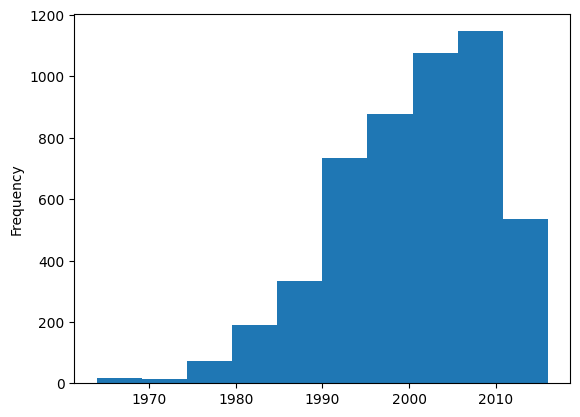

In [99]:
#ESERCIZIO3: selezionare il dataset metal_bands_2017.csv
''' con Seaborn visualizzare l'istogramma del numero dei fan delle varie band; cosa si vede? cosa se ne deduce?
    delle band che suonano sia Progressive che Thrash, realizzare un barplot che mostri quanti fan ci sono in totale rispetto al paese di origine
    visualizzare un istogramma delle date di formazione delle band; si nota qualche trend?'''

import pandas as pd
import seaborn as sns

url= ("Dataset/metal_bands_2017.csv")
df = pd.read_csv(url, encoding="latin1", index_col=0)

#df["fans"].plot(kind="hist") #istogramma fans

#creo filtro per lo sstile
filtro_style = (df.loc[:, "style"] == "Progressive") | (df.loc[:, "style"] == "Thrash")
style = df.loc[filtro_style]

fans_origin = style.groupby("origin")["fans"].sum() #raggruppo per paese e fans 

#fans_origin.plot(kind="barh")

df.isna().sum() #valori nulli
df["formed"].value_counts() #valori unici
df["formed"] = df["formed"].replace("-", None) #elimino quei dati - 
df["formed"] = df["formed"].astype(float) #converto 
df["formed"].plot(kind="hist")

In [ ]:
#ESERCIZIO4: selezionare il dataset elections.csv
'''con un grafico a barre confrontare i voti totali presi dai tre candidati (come somma di tutti i distretti)
   con un grafico a barre confrontare il numero di votanti per i primi dieci distretti '''

import pandas as pd

url = ("Dataset/elections.csv")
df = pd.read_csv(url)

#seleziono le tre colonne dei votanti, sommo i voti e creo barplot
df.loc[:, "Coderre":"Joly"].sum().plot(kind="barh") 

#seleziono i primi 10 distretti, settandoli come indice e filtro solo i voti totali
df.iloc[:10].set_index("district").loc[:, "total"].plot(kind="barh")

<Axes: xlabel='Borough', ylabel='count'>

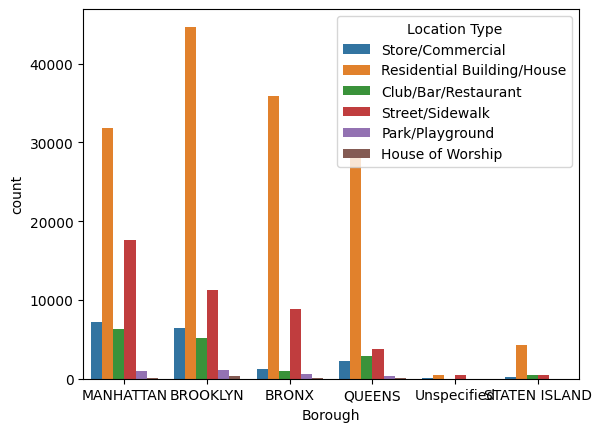

In [113]:
#ESERCIZIO5: selezionare il dataset party_in_nyc.csv
''' realizzare un grafico che mostra quante chiamate ci sono state per ogni città per tutti i tipi di locale
    qual è il rettangolo di latitudine e longitudine considerato dal dataset?
    quante segnalazioni sono state fatte per case private?
    con Seaborn visualizzare il conteggio delle segnalazioni avvenute in ogni quartiere; che succede se si aggiunge il parametro hue="Location Type"? '''

import pandas as pd
import seaborn as sns

url = ("Dataset/party_in_nyc.csv")
df = pd.read_csv(url)

#sns.countplot(data=df, y="City") #chiamate per città

df.loc[:, ["Latitude", "Longitude"]].agg(["min", "max"]) #quadrato long e lat

df.loc[df["Location Type"] == "Residential Building/House"].shape[0] #conto valori chiamate case private

sns.countplot(data=df, x="Borough", hue="Location Type") #segnalazioni per quartiere